# Exercise with A/B Testing

### Prompt

Let’s imagine you work on the For You Page at TikTok. Your team decides that instead of a heart button, they want to change it to star hoping that it will lead to a higher engagement/like rate. The product manager told you that the current conversion rate is about 6% on average throughout the year, and that the team would be happy with an increase of 3%, meaning that the new design will be considered a success if it raises the engagement rate to 9%.

Before rolling out the change, the team would be more comfortable testing it on a small number of users to see how it performs, so you suggest running an A/B test on a subset of the user base users.

In [1]:
# Packages imports
import numpy as np
import pandas as pd

# probability distributions & statistical functions
import scipy.stats as stats
# estimating statistical models
import statsmodels.stats.api as sms

import matplotlib.pyplot as plt
import seaborn as sns

#rounding function
from math import ceil



### Sample Size Calculation

In [2]:
# Calculate effect size based on our expected rates
effect_size = sms.proportion_effectsize(0.06, 0.09)

required_n = sms.NormalIndPower().solve_power(
    effect_size, 
    power=0.8, 
    alpha=0.05, 
    ratio=1
    )                                                  
# Calculating sample size needed
required_n = ceil(required_n)                                                
print(required_n)

1199


### Collecting and preparing the data

In [3]:
# Load the tiktok_data.csv into a dataframe
df = pd.read_csv('tiktok_data.csv')
df.head()


,user_id,timestamp,group,button,liked
0,767017,2017-01-12 22:58:15,control,star,0
1,793849,2017-01-23 22:36:11,treatment,star,0
2,905617,2017-01-20 14:12:19,treatment,star,0
3,746742,2017-01-23 11:38:30,control,heart,0
4,892356,2017-01-05 9:35:15,treatment,star,1


In [4]:
# Get the info of the dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275781 entries, 0 to 275780
Data columns (total 5 columns):
user_id      275781 non-null int64
timestamp    275781 non-null object
group        275781 non-null object
button       275781 non-null object
liked        275781 non-null int64
dtypes: int64(2), object(3)
memory usage: 10.5+ MB


In [36]:
# Make sure all the control group are seeing the star button and viceversa
pd.crosstab(df['group'], df['button'])

button,heart,star
group,,
control,136002,1816
treatment,1855,136108


In [7]:
# Check that no users have been sampled multiple times 
sample_count = df['user_id'].value_counts(ascending=False)
multi_users = sample_count[sample_count > 1].count()

print(multi_users)


3453


In [8]:
# If there are users who have been sampled multiple times, remove them from the dataframe
drop_users = sample_count[sample_count > 1].index

df = df[~df['user_id'].isin(drop_users)]
print(df.shape[0])


268875


#### Now that our DataFrame is nice and clean, we can proceed and sample n=4720 entries for each of the groups. We can use pandas' DataFrame.sample() method to do this, which will perform Simple Random Sampling for us.

In [9]:
# Perform simple random sampling to split the data into control and treatment
control_sample = df[df['group'] == 'control'].sample(n = required_n, random_state = 22)
treatment_sample = df[df['group'] == 'treatment'].sample(n = required_n, random_state = 22)

In [11]:
# Create one table called ab_test that has both the cleaned control and treatment data
ab_test = pd.concat([control_sample, treatment_sample], axis = 0)
ab_test.reset_index(drop=True, inplace=True)
ab_test

,user_id,timestamp,group,button,liked
0,644761,2017-01-20 5:19:16,control,heart,0
1,856804,2017-01-02 23:19:00,control,heart,0
2,728826,2017-01-03 4:16:37,control,heart,0
3,865441,2017-01-19 3:59:57,control,heart,0
4,796969,2017-01-05 4:08:26,control,heart,0
5,754519,2017-01-06 20:07:55,control,heart,0
6,759201,2017-01-07 10:31:32,control,heart,0
7,689346,2017-01-08 13:39:03,control,heart,0
8,773513,2017-01-07 20:12:42,control,heart,0
9,820713,2017-01-08 9:44:26,control,heart,0


In [12]:
# Count the test groups to make sure that they're balanced 
ab_test['group'].value_counts()

control      1199
treatment    1199
Name: group, dtype: int64

### Analysis Visualization

In [13]:
# Find the like rate by group
like_rates = ab_test.groupby('group')['liked']

# Find the Std. deviation of the proportion
std_p = lambda x: np.std(x,ddof = 0)

# Find the Std. error of the proportion (std / sqrt(n))
stde_p = lambda x: stats.sem(x,ddof=0)

# Calculate the final like rate
like_rates = like_rates.agg([np.mean, std_p, stde_p])
like_rates.columns = ['conversion_rate', 'std_deviation', 'std_error']
like_rates.style.format('{:.3f}')

SpecificationError: Function names must be unique, found multiple named <lambda>

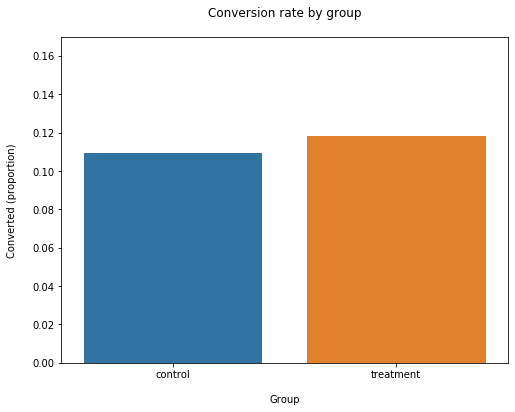

In [14]:
# Plot the like rate by group on a bar plot
plt.figure(figsize=(8,6))

sns.barplot(x=ab_test['group'], y=ab_test['liked'], ci=False)

plt.ylim(0, 0.17)
plt.title('Conversion rate by group', pad=20)
plt.xlabel('Group', labelpad=15)
plt.ylabel('Converted (proportion)', labelpad=15);


### Testing for Stat Sig

In [15]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

# Get the like count for both control and treatment groups
control_results = ab_test[ab_test['group'] == 'control']['liked']
treatment_results = ab_test[ab_test['group'] == 'treatment']['liked']

# Get the number of samples in both groups
n_con = control_results.count()
n_treat = treatment_results.count()

# Sum up the number of successes (likes) in both groups
successes = [control_results.sum(), treatment_results.sum()]
successes

[131, 142]

In [16]:
# Find the z statistic and p value for proportions based on normal ztest
nobs = [n_con,n_treat]
z_stat, pval = proportions_ztest(successes, nobs=nobs) 
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

# Find the confidence intervals for each test group



In [17]:
print(nobs)

[1199, 1199]


In [47]:
# print z statistic
print(f'z statistic: {z_stat:.2f}')
# print p-value
print(f'p-value: {pval:.3f}')
# print ci 95% for control group
print(f'ci 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
# print ci 95% for treatment group
print(f'ci 95% for treatment group: [{lower_treat:.3f}, {upper_treat:.3f}]')

z statistic: -0.71
p-value: 0.479
ci 95% for control group: [0.092, 0.127]
ci 95% for treatment group: [0.100, 0.137]


### Were the results signficant? 

In [23]:
print("From my result I can observed that the p-value is much hiher than alpha=0.05 ")
print("The p value is not significant")
print("Since p-value is more than alpha, we keep the null hypothesis")

From my result I can observed that the p-value is much hiher than alpha=0.05 
The p value is not significant
Since P-value is more than alpha, we keep the null hypothesis


### What would you advise the engineering team to do moving forward?

In [ ]:
print("My advice to the team would ")